In [51]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [52]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [53]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [54]:
# Combine the data into a single dataset
pyber_data =  pd.merge(ride_data, city_data, on=['city', 'city'], how='left')

#delete duplicates
pyber_data = pyber_data.drop_duplicates()

# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [55]:
# Create a new df for each type
urban_info = pyber_data.loc[(pyber_data['type'] == 'Urban')]
suburban_info = pyber_data.loc[(pyber_data['type'] == 'Suburban')]
rural_info = pyber_data.loc[(pyber_data['type'] == 'Rural')]


# Calc total rides , driver count and avg fare for each city type:
#urban
avg_fare_urban = urban_info.groupby(['city'])['fare'].mean()
rides_urban = urban_info.groupby(['city'])['ride_id'].count()
drivers_urban = urban_info.groupby(['city']).mean()['driver_count']
#suburban
avg_fare_suburban = suburban_info.groupby(['city'])['fare'].mean()
rides_suburban = suburban_info.groupby(['city'])['ride_id'].count()
drivers_suburban = suburban_info.groupby(['city']).mean()['driver_count']
#rural
avg_fare_rural = rural_info.groupby(['city'])['fare'].mean()
rides_rural = rural_info.groupby(['city'])['ride_id'].count()
drivers_rural = rural_info.groupby(['city']).mean()['driver_count']

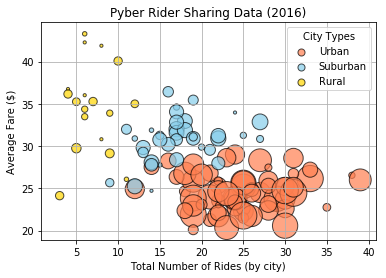

<Figure size 432x288 with 0 Axes>

In [56]:
# Build the scatter plots for each city types
#urban
urban_chart = plt.scatter(rides_urban, avg_fare_urban, s=drivers_urban*10, marker='o', color='coral', alpha=.7, edgecolor='black', label='Urban')
#suburban
suburban_chart = plt.scatter(rides_suburban, avg_fare_suburban, s=drivers_suburban*10, marker='o', color='skyblue', alpha=.7, edgecolor='black', label='Suburban')
#rural
rural_chart = plt.scatter(rides_rural, avg_fare_rural, s=drivers_rural*10, marker='o', color='gold', alpha=.7, edgecolor='black', label='Rural')


# Incorporate the other graph properties
plt.xlabel('Total Number of Rides (by city)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Rider Sharing Data (2016)')
plt.grid(True)

# Create a legend
lgnd = plt.legend(title = 'City Types')

lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

#show plot
plt.show()


# Save Figure
plt.savefig('data/pyber_scatter.png')

## Total Fares by City Type

In [57]:
# Calculate Type Percents
urban_total_fare = urban_info['fare'].sum()
suburban_total_fare = suburban_info['fare'].sum()
rural_total_fare = rural_info['fare'].sum()

#check calculated data
pie_fare_df = pd.DataFrame ({'Urban Total Fare' : [urban_total_fare],
                             'Suburban Total Fare' : [suburban_total_fare],
                             'Rural Total Fare' : [rural_total_fare]})
pie_fare_df

,Urban Total Fare,Suburban Total Fare,Rural Total Fare
0,39854.38,19356.33,4327.93


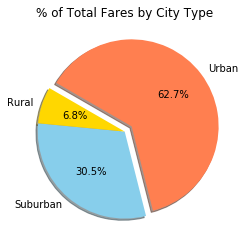

<Figure size 432x288 with 0 Axes>

In [58]:
#Build Pie Chart
slices_fares = [urban_total_fare, suburban_total_fare, rural_total_fare]
citytype = ['Urban', 'Suburban', 'Rural']
explode = (.1, 0, 0)
colors = ('coral', 'skyblue', 'gold')

plt.pie(slices_fares, labels = citytype, startangle = 150, explode = explode, autopct = '%.1f%%', shadow = True, counterclock = False, colors = colors)
plt.title('% of Total Fares by City Type')
plt.show()
# Save Figure
plt.savefig('data/pyber_fare_perc.png')

In [59]:
# Show Figure
plt.show()

## Total Rides by City Type

In [60]:
# Calculate Ride Percents
urban_total_rides = urban_info['ride_id'].count()
suburban_total_rides = suburban_info['ride_id'].count()
rural_total_rides = rural_info['ride_id'].count()

#check calculaed data
pie_rides_df = pd.DataFrame ({'Urban Total Rides' : [urban_total_rides],
                               'Suburban Total Rides' : [suburban_total_rides],
                               'Rural Total Rides' : [rural_total_rides]})
pie_rides_df

,Urban Total Rides,Suburban Total Rides,Rural Total Rides
0,1625,625,125


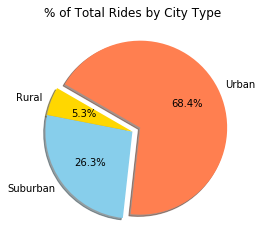

<Figure size 432x288 with 0 Axes>

In [61]:
# Build Pie Chart
slices_rides = [urban_total_rides, suburban_total_rides, rural_total_rides]
explode = (.1, 0, 0)
colors = ('coral', 'skyblue', 'gold')

plt.pie(slices_rides, labels = citytype, startangle = 150, explode = explode, autopct = '%.1f%%', shadow = True, counterclock = False, colors = colors)
plt.title('% of Total Rides by City Type')

#show plot
plt.show()

# Save Figure
plt.savefig('data/pyber_rider_perc.png')

## Total Drivers by City Type

In [62]:
#drop duplicates on each city type sheet
urban_info_no_dupes=urban_info.drop_duplicates('city')
suburban_info_no_dupes=suburban_info.drop_duplicates('city')
rural_info_no_dupes=rural_info.drop_duplicates('city')

In [63]:
# Calculate Driver Percents
urban_total_drivers = urban_info_no_dupes['driver_count'].sum()
suburban_total_drivers = suburban_info_no_dupes['driver_count'].sum()
rural_total_drivers = rural_info_no_dupes['driver_count'].sum()

#check calculated data
pie_drivers_df = pd.DataFrame ({'Urban Total Drivers' : [urban_total_drivers],
                               'Suburban Total Drivers' : [suburban_total_drivers],
                               'Rural Total Drivers' : [rural_total_drivers]})
pie_drivers_df

,Urban Total Drivers,Suburban Total Drivers,Rural Total Drivers
0,2405,490,78


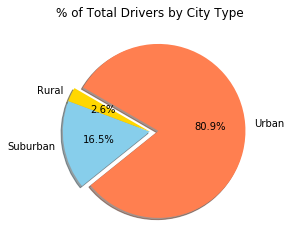

<Figure size 432x288 with 0 Axes>

In [64]:
# Build Pie Charts
slices_drivers = [urban_total_drivers, suburban_total_drivers, rural_total_drivers]
explode = (.1, 0, 0)
colors = ('coral', 'skyblue', 'gold')

plt.pie(slices_drivers, labels = citytype, startangle = 150, explode = explode, autopct = '%.1f%%', shadow = True, counterclock = False, colors = colors)
plt.title('% of Total Drivers by City Type')

#show plot
plt.show()

# Save Figure
plt.savefig('data/pyber_driver_perc.png')